In [32]:
# import the library

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
import seaborn as sns
import cv2
import tensorflow as tf
from PIL import Image

# set the random seed for tensorflow
tf.random.set_seed(1234)

In [33]:
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

In [34]:
# load the mnist dataset from keras
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [35]:
# shape of the dataset
print("Shape of the training dataset: ", x_train.shape)
print("Shape of the testing dataset: ", x_test.shape)

Shape of the training dataset:  (60000, 28, 28)
Shape of the testing dataset:  (10000, 28, 28)


**Training Data**

60,000 images
Each image is 28x28 pixels in size

**Test Data**

100,000 images
Each image is 28x28 pixels in size

**All are gray scale imaged**

In [36]:
x_train[0].shape # shape of the first image 28x28

(28, 28)

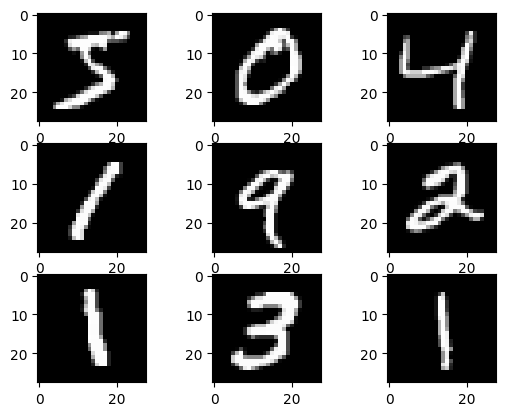

In [37]:
# plot the first 9 images
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))

In [38]:
# the unique values in the training dataset
print("Unique values in the training dataset: ", np.unique(y_train))

Unique values in the training dataset:  [0 1 2 3 4 5 6 7 8 9]


In [39]:
# normalize the dataset
x_train = x_train / 255.0
x_test = x_test / 255.0

In [40]:
# import the required libraries for the model

from keras.models import Sequential
from keras.layers import Dense, Flatten, Input

In [41]:
model = Sequential()

In [42]:
model.add(Input(shape=(28, 28)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [43]:
# train the model
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 792us/step - accuracy: 0.8754 - loss: 0.4322
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 795us/step - accuracy: 0.9601 - loss: 0.1311
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 803us/step - accuracy: 0.9748 - loss: 0.0851
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 795us/step - accuracy: 0.9826 - loss: 0.0613
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 807us/step - accuracy: 0.9871 - loss: 0.0451
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 809us/step - accuracy: 0.9902 - loss: 0.0341
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 800us/step - accuracy: 0.9933 - loss: 0.0253
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 809us/step - accuracy: 0.9943 - loss: 0.0201
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 803us/step - accuracy: 0.9951 - loss: 0.0161
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 808us/step - accuracy: 0.9954 - loss: 0.0147


In [44]:
# evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 459us/step - accuracy: 0.9686 - loss: 0.1333


In [45]:
loss, accuracy

(0.11247295886278152, 0.9718999862670898)

In [46]:
# print X_test shape
print("X_test shape: ", x_test.shape)

X_test shape:  (10000, 28, 28)


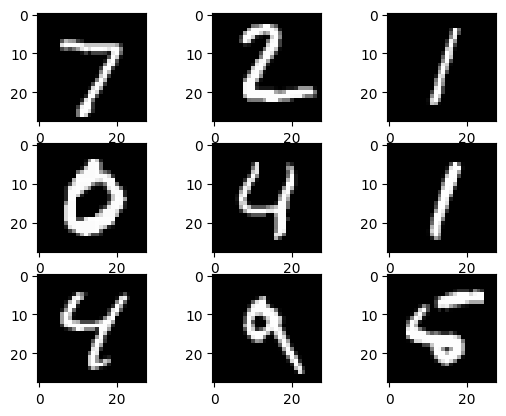

In [47]:
# display the first 9 images
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(x_test[i], cmap=plt.get_cmap('gray'))

In [48]:
# print Y_test values
print("Y_test values: ", y_test[:9])

Y_test values:  [7 2 1 0 4 1 4 9 5]


In [49]:
# make predictions
predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 540us/step


In [50]:
# shape of the predictions
print("Shape of the predictions: ", predictions.shape)

Shape of the predictions:  (10000, 10)


In [51]:
# get the index of the highest probability
predictions = np.argmax(predictions, axis=1)

In [52]:
# predictions shape
print("Shape of the predictions: ", predictions.shape)

# print the first 9 predictions
print("First 9 predictions: ", predictions[:9])

Shape of the predictions:  (10000,)
First 9 predictions:  [7 2 1 0 4 1 4 9 5]


In [53]:
# confusion matrix
cm = confusion_matrix(y_test, predictions)
print(cm)

tf.Tensor(
[[ 967    0    1    2    1    4    0    1    2    2]
 [   0 1124    4    2    0    1    2    1    1    0]
 [   4    2 1005    6    2    0    2    7    3    1]
 [   0    0    4  997    0    1    0    1    1    6]
 [   2    0    2    1  940    0    2    3    0   32]
 [   2    0    0   23    0  853    2    0    6    6]
 [   8    1    4    2    7   10  921    1    4    0]
 [   0    2   11    8    0    0    0 1000    1    6]
 [   4    0    6   20    5    6    1    3  923    6]
 [   0    2    1    5    3    4    0    5    0  989]], shape=(10, 10), dtype=int32)


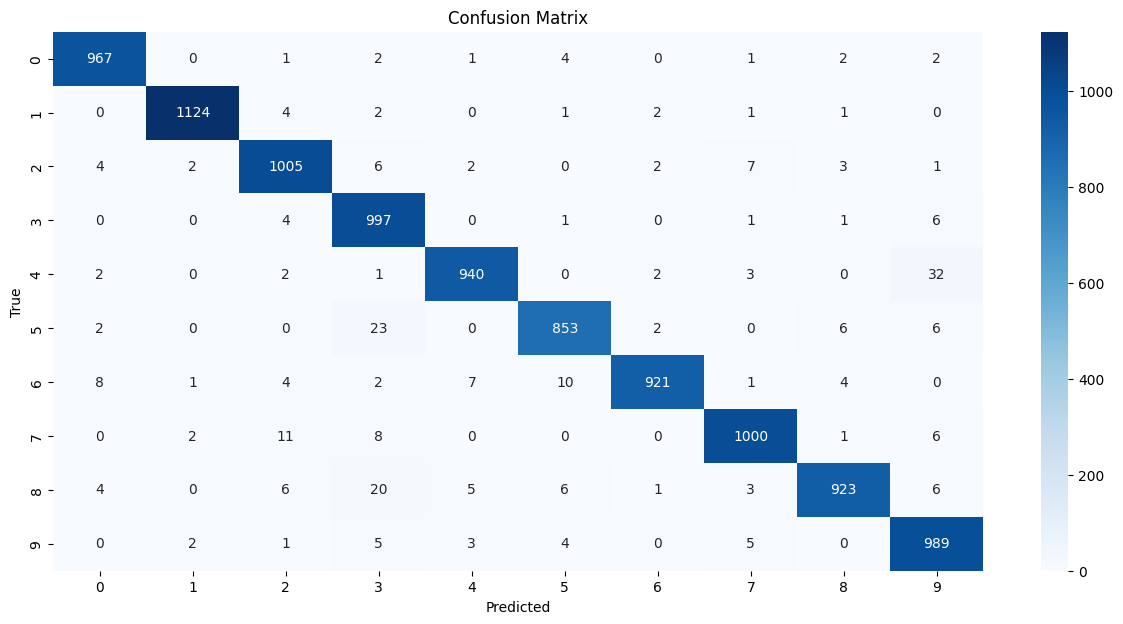

In [54]:
# plot the confusion matrix
plt.figure(figsize=(15, 7))
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [55]:
# building the predictive system
def predict_image(image):
    # load the image
    image = cv2.imread(image, cv2.IMREAD_GRAYSCALE)
    # resize the image
    image = cv2.resize(image, (28, 28))
    # invert the image
    image = cv2.bitwise_not(image)
    # normalize the image
    image = image / 255.0
    # reshape the image
    image = image.reshape(1, 28, 28)
    # make the prediction
    prediction = model.predict(image)
    # get the index of the highest probability
    prediction = np.argmax(prediction, axis=1)
    return prediction[0]

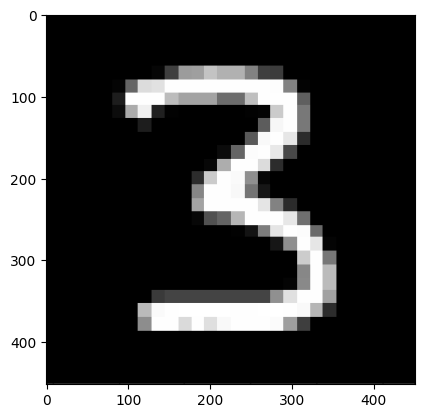

In [56]:
import cv2

image = 'image.png'

# show the image2 using cv2
img = cv2.imread(image)
plt.imshow(img)

In [57]:
#   make prediction
prediction = predict_image(image)
print("Prediction: ", prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Prediction:  2
